In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set() # set the default seaborn style for graphics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import plotly.io as pio

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [2]:
#import full-version dataset
data=pd.read_csv("data.csv")
damage=pd.read_csv("demage.csv")

# adding labels to train dataset
data["damage_grade"]=damage["damage_grade"]
print("shape of the variable-damage dataset: ",data.shape)
print("shape of the demage dataset: ",damage.shape)

shape of the variable-damage dataset:  (260601, 40)
shape of the demage dataset:  (260601, 2)


In [3]:
data.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [4]:
print(data.dtypes)

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

### Basic Data Analysis 

In [5]:
# exploring the univariate statistical features of train dataset (for numeric variables)
data.describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
building_id,260601.000000,525675.482773,304544.999032,4.000000,261190.000000,525757.000000,789762.000000,1052934.000000
geo_level_1_id,260601.000000,13.900353,8.033617,0.000000,7.000000,12.000000,21.000000,30.000000
geo_level_2_id,260601.000000,701.074685,412.710734,0.000000,350.000000,702.000000,1050.000000,1427.000000
geo_level_3_id,260601.000000,6257.876148,3646.369645,0.000000,3073.000000,6270.000000,9412.000000,12567.000000
count_floors_pre_eq,260601.000000,2.129723,0.727665,1.000000,2.000000,2.000000,2.000000,9.000000
age,260601.000000,26.535029,73.565937,0.000000,10.000000,15.000000,30.000000,995.000000
area_percentage,260601.000000,8.018051,4.392231,1.000000,5.000000,7.000000,9.000000,100.000000
height_percentage,260601.000000,5.434365,1.918418,2.000000,4.000000,5.000000,6.000000,32.000000
has_superstructure_adobe_mud,260601.000000,0.088645,0.284231,0.000000,0.000000,0.000000,0.000000,1.000000
has_superstructure_mud_mortar_stone,260601.000000,0.761935,0.425900,0.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# exploring the univariate statistical features of train dataset (for categorical (object) variables)
data.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [7]:
# checking the types of variables in the dataset(int,float,object)
dtypes=pd.DataFrame(data.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=data.nunique()
dtypes["Null Values"]=data.isnull().sum()
dtypes["% null Values"]=data.isnull().sum()/len(data)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


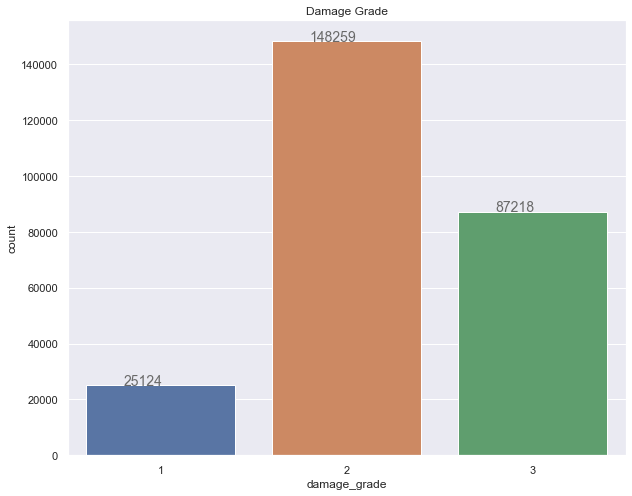

In [8]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize=(10,8))
ax=sb.countplot("damage_grade",data=data)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  


### One-hot Encoding to prepare Classification Tree

In [9]:
data_new = data
for var in ['land_surface_condition','foundation_type','roof_type','ground_floor_type',\
            'other_floor_type','position','plan_configuration','legal_ownership_status']:
    data_new = pd.concat([data_new,pd.get_dummies(data[var], prefix=var )],axis=1)
    data_new.drop([var] ,axis=1, inplace=True)
    

In [10]:
data_new.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
data_new.drop(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'damage_grade'], axis=1, inplace=True)

In [12]:
print(data_new.shape)

(260601, 65)


### Classification Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5987768610897928

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5914506628806048



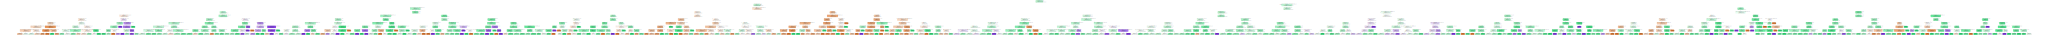

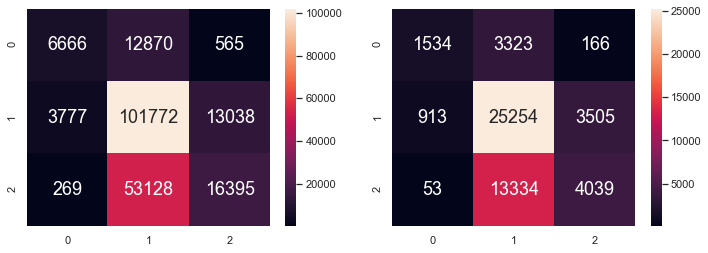

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

y = pd.DataFrame(damage['damage_grade'])
X = data_new

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 9)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth=6)
# Train the model on training data
rf.fit(X_train, y_train);


In [16]:
feature_list = list(data_new.columns)
features = np.array(data_new)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: foundation_type_r    Importance: 0.6
Variable: has_superstructure_mud_mortar_stone Importance: 0.09
Variable: has_superstructure_cement_mortar_brick Importance: 0.09
Variable: count_floors_pre_eq  Importance: 0.04
Variable: age                  Importance: 0.03
Variable: has_superstructure_stone_flag Importance: 0.03
Variable: foundation_type_i    Importance: 0.03
Variable: has_superstructure_timber Importance: 0.02
Variable: has_superstructure_adobe_mud Importance: 0.01
Variable: has_superstructure_mud_mortar_brick Importance: 0.01
Variable: foundation_type_u    Importance: 0.01
Variable: ground_floor_type_v  Importance: 0.01
Variable: position_s           Importance: 0.01
Variable: area_percentage      Importance: 0.0
Variable: height_percentage    Importance: 0.0
Variable: has_superstructure_cement_mortar_stone Importance: 0.0
Variable: has_superstructure_bamboo Importance: 0.0
Variable: has_superstructure_rc_non_engineered Importance: 0.0
Variable: has_superstructure_rc_e

In [17]:
df = pd.DataFrame({'Importance':importances,'feature':feature_list})
df.sort_values('Importance',inplace=True)
df.head()

,Importance,feature
57,0.0,plan_configuration_o
55,0.0,plan_configuration_m
54,0.0,plan_configuration_f
25,0.0,has_secondary_use_use_police
51,0.0,plan_configuration_a


In [18]:
importance_1 = df['Importance'].tolist()
feature_list_1 = df['feature'].tolist()

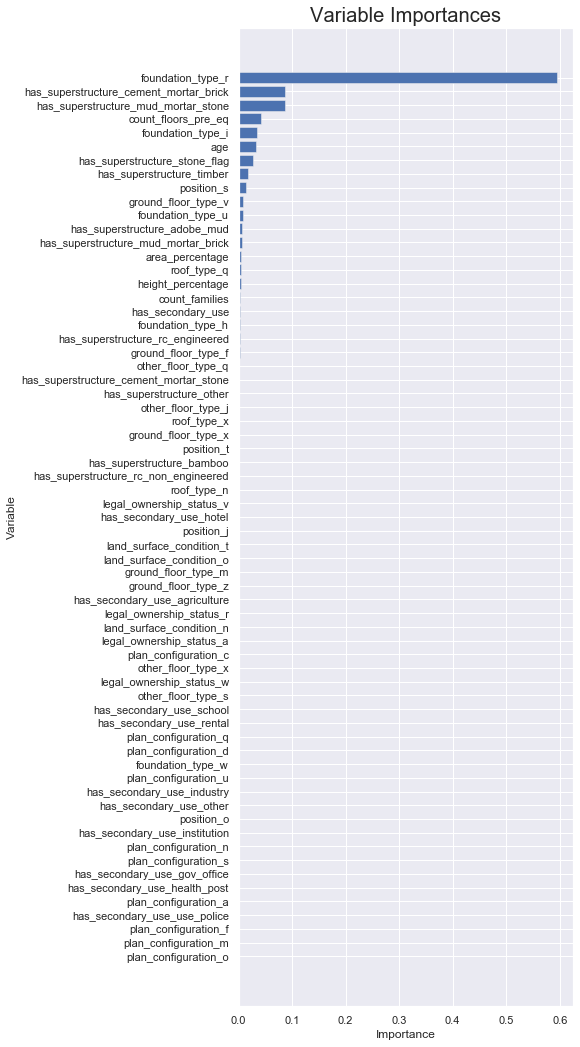

In [19]:
f, axes = plt.subplots(1, 1, figsize=(6, 18))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
y_values = list(range(len(importance_1)))
# Make a bar chart
plt.barh(y_values, importance_1, orientation = 'horizontal')
# Tick labels for x axis
plt.yticks(y_values, feature_list_1, rotation='horizontal')
# Axis labels and title
plt.ylabel('Variable'); plt.xlabel('Importance'); plt.title('Variable Importances');

### Bivariate Analysis for important variables

In [20]:
df1 = data[data['damage_grade'] == 1]
df1.shape
df1.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
36,864809,13,305,5956,2,0,9,8,t,r,q,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
45,440102,7,157,5265,1,5,11,3,n,i,x,v,j,t,d,0,0,0,0,0,0,0,0,1,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,1
49,402996,26,762,742,1,0,15,3,n,u,x,v,j,s,d,0,1,0,0,0,1,0,0,0,0,1,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
df2 = data[data['damage_grade'] == 2]
df2.shape
df2.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
11,452227,17,1275,4004,1,10,8,4,t,u,n,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,2


In [22]:
df3 = data[data['damage_grade'] == 3]
df3.shape
df3.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
10,7962,17,1119,12188,2,20,9,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### Bivariate Analysis for Numeric Variables

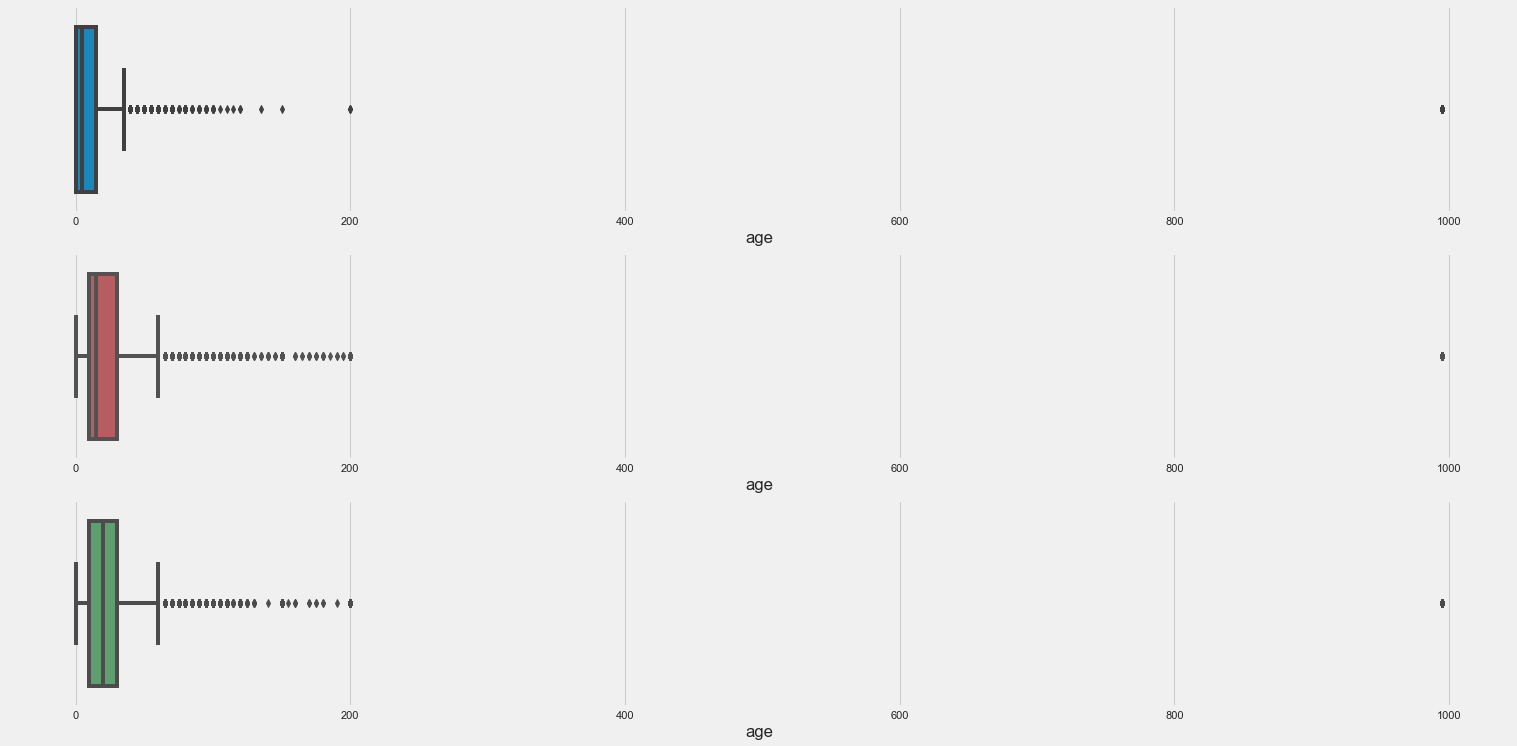

In [23]:
#STATISTICAL DISTRIBUTION FOR AGE VS DAMAGE_GRADE
f, axes = plt.subplots(3, 1, figsize=(24, 12))
sb.boxplot(df1['age'], ax = axes[0])
sb.boxplot(df2['age'], ax = axes[1], color = 'r')
sb.boxplot(df3['age'], ax = axes[2], color = 'g')

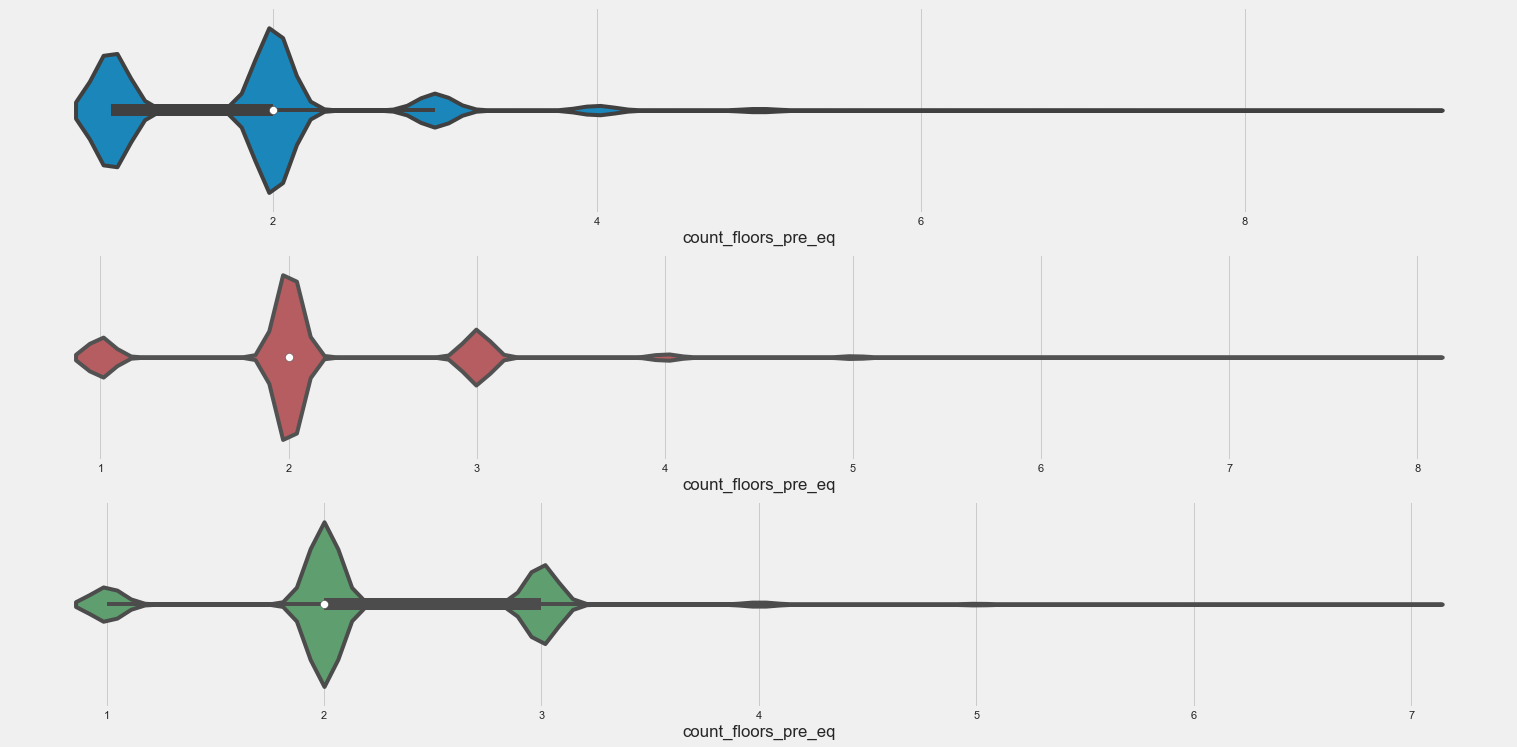

In [24]:
#STATISTICAL DISTRIBUTION FOR COUNT_FLOORS_PRE_EQ VS DAMAGE_GRADE
f, axes = plt.subplots(3, 1, figsize=(24, 12))
sb.violinplot(df1['count_floors_pre_eq'], ax = axes[0])
sb.violinplot(df2['count_floors_pre_eq'], ax = axes[1], color = 'r')
sb.violinplot(df3['count_floors_pre_eq'], ax = axes[2], color = 'g')

In [35]:
# Tri-variable scatter plot on age, count_floors_pre_eq and damage_grade

grade = age = pd.DataFrame(data['damage_grade']) 
age = pd.DataFrame(data['age']) 
floor = pd.DataFrame(data['count_floors_pre_eq'])
joint = pd.concat([age, floor.reindex(index=age.index), grade.reindex(index=age.index)], sort = False, axis = 1)

In [36]:
joint.head()

,age,count_floors_pre_eq,damage_grade
0,30,2,3
1,10,2,2
2,10,2,3
3,10,2,2
4,30,3,3


In [37]:
a=[]
b=[]
for i in range(0,996,5):
    a.append([])
    b.append([])
    for j in range(0,10):
        a[int(i/5)].append(0)
        b[int(i/5)].append(0)
    
for count in range(0,260601):
    b [int(joint["age"][count]/5)] [joint["count_floors_pre_eq"][count]] += 1
    
    a [int(joint["age"][count]/5)] [joint["count_floors_pre_eq"][count]] += joint["damage_grade"][count]
    
for i in range(0,996,5):
    for j in range(0,10):
        if(b[int(i/5)][j]!=0):
            a[int(i/5)][j] = float(a[int(i/5)][j])/float(b[int(i/5)][j])
 

In [38]:
obj = pd.DataFrame(columns=['age','count_floor','damage_grade','colors'])

count = 0
for i in range(0,996,5):
    for j in range(0,10):
        if(a[int(i/5)][j]!=0):
            obj = obj.append({'age': i, 'count_floor': j, 'damage_grade': a[int(i/5)][j], 'colors': (1.0-a[int(i/5)][j]/3.0, 1.0-a[int(i/5)][j]/3.0 ,1)}, \
                             ignore_index=True)
            count += 1
            
#print(obj.head())

In [39]:
from matplotlib import rcParams

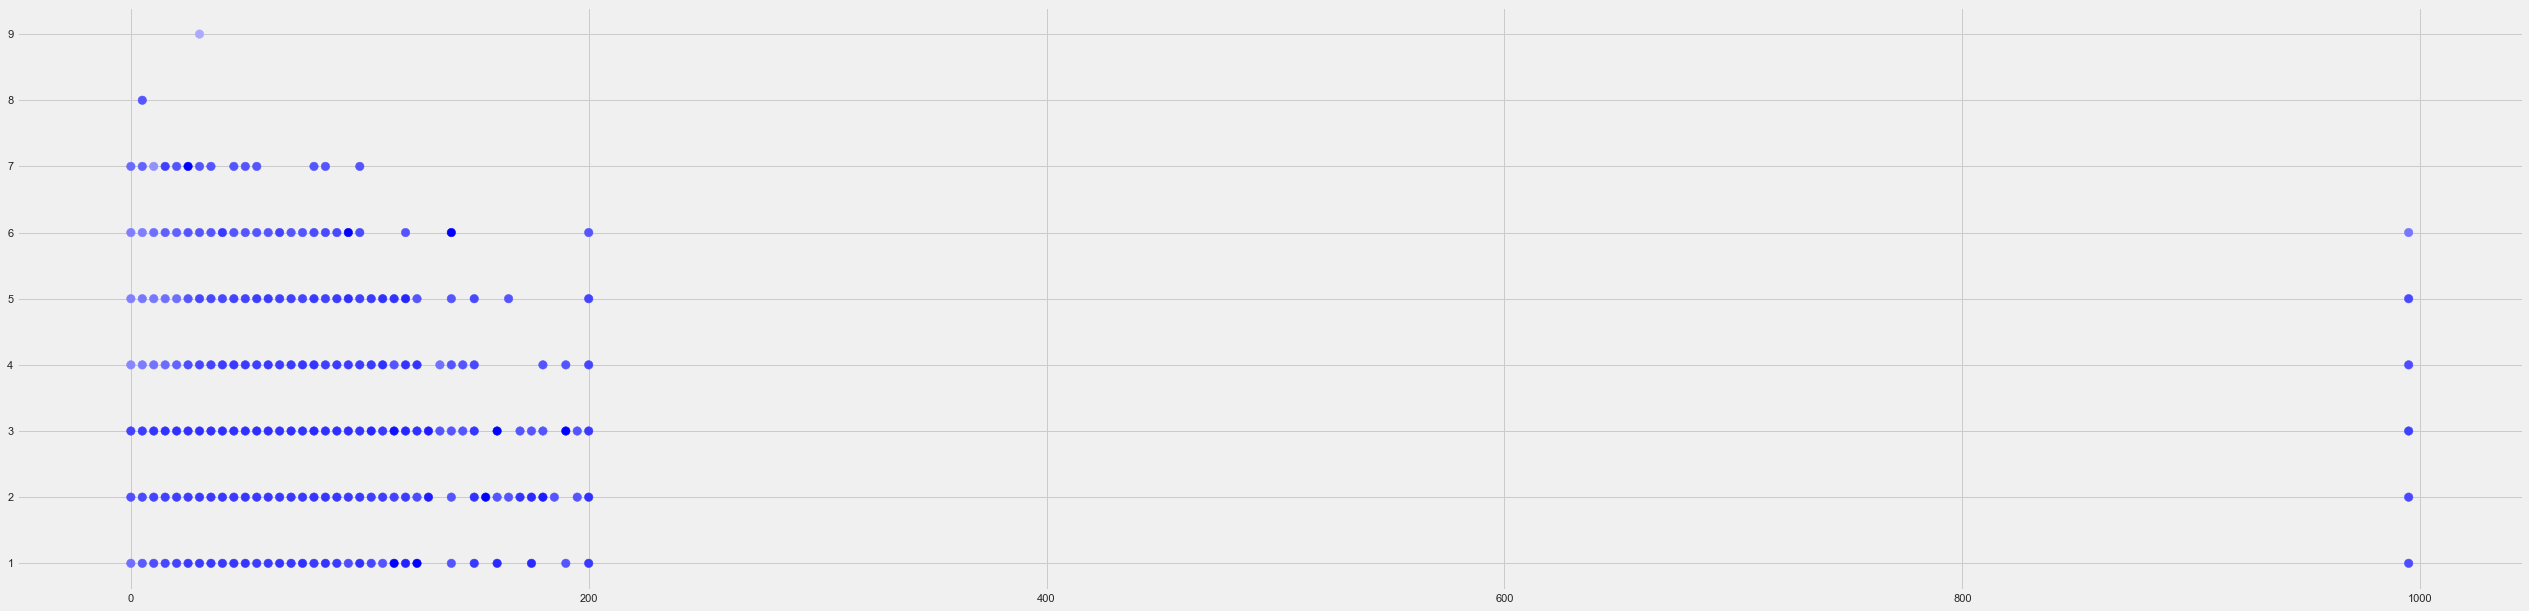

In [40]:
f, axes = plt.subplots(1, 1, figsize=(40,10))
plt.scatter(x = "age", y = "count_floor", c = "colors", data = obj, 
            norm = True, s= 2*rcParams['lines.markersize'] ** 2 )

### Bivariate Analysis for Categorical Variables

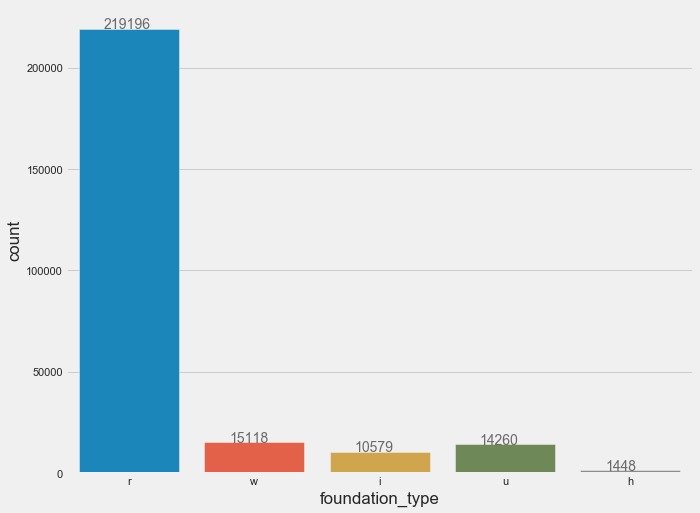

In [34]:
plt.figure(figsize=(10,8))
ax=sb.countplot("foundation_type",data=data)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()  

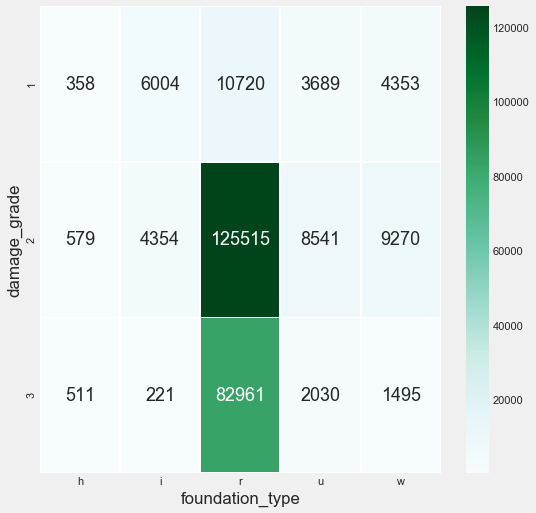

In [26]:
#HEATMAP FOR DAMAGE_GRADE VS FOUNDATION_TYPE
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.heatmap(data.groupby(['damage_grade', 'foundation_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

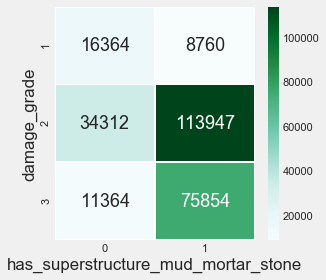

In [25]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_MUD_MORTAR_STONE
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_mud_mortar_stone'] = data['has_superstructure_mud_mortar_stone'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_mud_mortar_stone']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

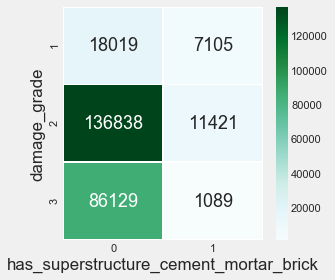

In [27]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_CEMENT_MORTAR_BRICK
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_cement_mortar_brick'] = data['has_superstructure_cement_mortar_brick'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_cement_mortar_brick']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

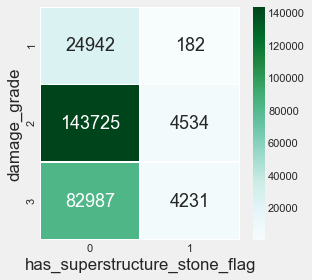

In [28]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_STONE_FLAG
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_stone_flag'] = data['has_superstructure_stone_flag'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_stone_flag']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

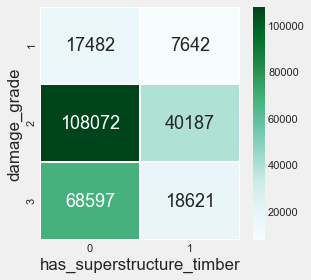

In [29]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_TIMBER
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_timber'] = data['has_superstructure_timber'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_timber']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

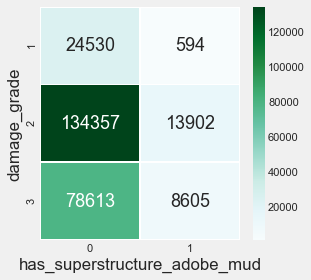

In [30]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_ADOBE_MUD
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_adobe_mud'] = data['has_superstructure_adobe_mud'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_adobe_mud']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

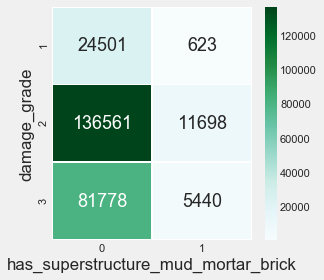

In [31]:
#HEATMAP FOR DAMAGE_GRADE VS HAS_SUPERSTRUCTURE_MUD_MORTAR_BRICK
f, axes = plt.subplots(1, 1, figsize=(4, 4))
data['has_superstructure_mud_mortar_brick'] = data['has_superstructure_mud_mortar_brick'].astype('category')
sb.heatmap(data.groupby(['damage_grade', 'has_superstructure_mud_mortar_brick']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

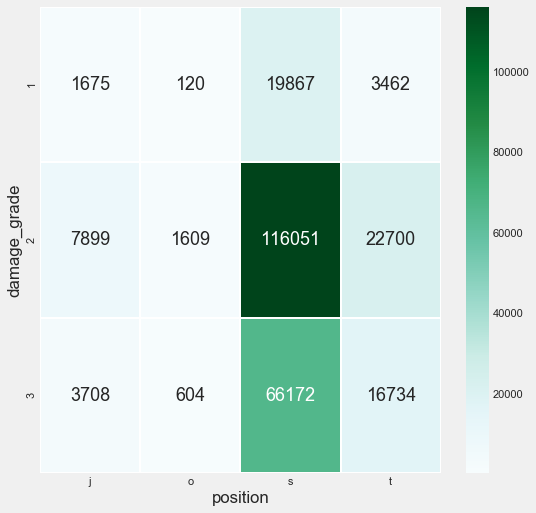

In [32]:
#HEATMAP FOR DAMAGE_GRADE VS POSITION
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.heatmap(data.groupby(['damage_grade', 'position']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

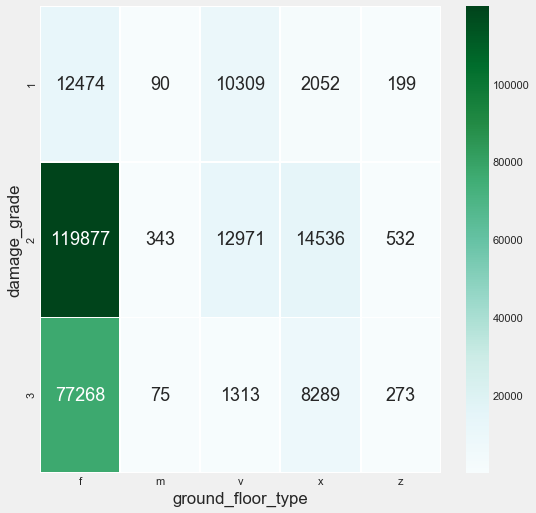

In [33]:
#HEATMAP FOR DAMAGE_GRADE VS GROUND_FLOOR_TYPE
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.heatmap(data.groupby(['damage_grade', 'ground_floor_type']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn",fmt='g')

In [41]:
#foundation_type, simulation
lst = []
data_t = data_new
for var in ['foundation_type_h','foundation_type_i','foundation_type_r','foundation_type_u','foundation_type_w']:
    
    data_t['foundation_type_h'].replace({1:0},inplace=True)
    data_t['foundation_type_i'].replace({1:0},inplace=True)
    data_t['foundation_type_r'].replace({1:0},inplace=True)
    data_t['foundation_type_u'].replace({1:0},inplace=True)
    data_t['foundation_type_w'].replace({1:0},inplace=True)
    
    data_t[var].replace({0:1},inplace=True)

    pred = dectree.predict(data_t)
    
    lst.append(sum(pred))
    
    
print(lst)

[481303, 535182, 554526, 524022, 514772]


In [42]:
f_lst = []
for i in range(5):
    f_lst.append(float(lst[i]/260601.0))
    
print(f_lst)

[1.846896212984601, 2.0536452277619808, 2.127873645918473, 2.010821140364005, 1.9753262650565424]


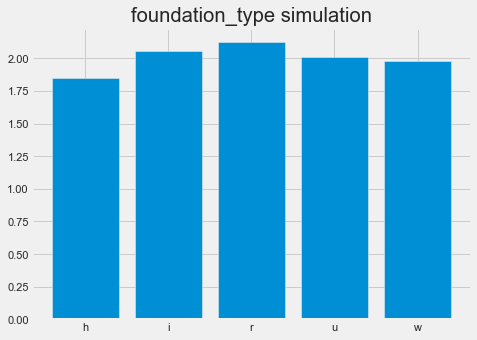

In [43]:
f, axes = plt.subplots(1, 1, figsize=(7, 5))

ftype = ['h', 'i', 'r', 'u', 'w']

plt.bar(ftype,f_lst)
plt.title('foundation_type simulation')
plt.show()


### For fundation_type, the order of sturdiness variates when the random split for the train set to fit classification tree variates. It's hard to conclude which foundation type is firmer when facing earthquakes.

In [44]:
#has_superstructure_mud_mortar_stone, simulation

lst = []
data_t = data_new

#has_superstructure_mud_mortar_stone = 0

data_t['has_superstructure_mud_mortar_stone'].replace({1:0},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

#has_superstructure_mud_mortar_stone = 1
data_t['has_superstructure_mud_mortar_stone'].replace({0:1},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

print(lst)

[504112, 522250]


In [45]:
f_lst = []
for i in range(2):
    f_lst.append(float(lst[i]/260601.0))
    
print(f_lst)

[1.9344208195670776, 2.00402147344024]


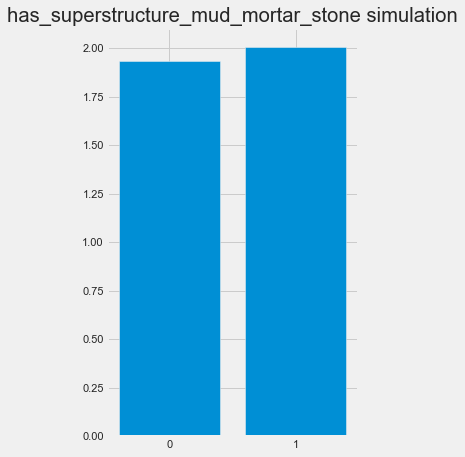

In [46]:

f, axes = plt.subplots(1, 1, figsize=(4, 7))
ftype = ['0','1']

plt.bar(ftype,f_lst)
plt.title('has_superstructure_mud_mortar_stone simulation')

plt.show()

### For has_superstructure_mud_mortar_stone:
### the damage grade would be higher if the structure is made of mud, mortar and stone

In [47]:
#has_superstructure_cement_mortar_brick, simulation

lst = []
data_t = data_new

#has_superstructure_cement_mortar_brick = 0

data_t['has_superstructure_cement_mortar_brick'].replace({1:0},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

#has_superstructure_cement_mortar_brick = 1
data_t['has_superstructure_cement_mortar_brick'].replace({0:1},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

print(lst)

[522250, 522250]


### From the current classification tree model, 
### it seems that the variable has_superstructure_cement_mortar_brick has little effect on the damage grade

In [48]:
#count_floors_pre_eq, simulation
lst = []
data_t = data_new
for i in range(1,10):
    
    data_t = data_t.assign(count_floors_pre_eq = i)

    pred = dectree.predict(data_t)
    
    lst.append(sum(pred))
    
    
print(lst)

[522250, 522250, 522250, 522250, 522250, 522250, 522250, 522250, 522250]


### From the current classification tree model, 
### it seems that the variable count_floors_pre_eq has little effect on the damage grade

In [49]:
#age, simulation
lst = []
data_t = data_new
for i in range(1,1000):
    
    data_t = data_t.assign(age = i)

    pred = dectree.predict(data_t)
    
    lst.append(sum(pred))
    
    
print(lst)

[507165, 507165, 520118, 520118, 520118, 520118, 520118, 520118, 520118, 520118, 520118, 520118, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860, 527860,

In [50]:
f_lst = []
for i in range(3):
    f_lst.append(float(lst[i]/260601.0))
    
print(f_lst)

[1.9461360470604487, 1.9461360470604487, 1.9958403843423471]


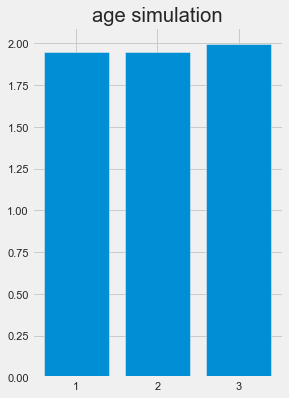

In [52]:
f, axes = plt.subplots(1, 1, figsize=(4, 6))
ftype = ['1','2', '3']

plt.bar(ftype,f_lst)
plt.title('age simulation')

plt.show()

### in the first 2 years, damage grade would be low. However, from age 3 onwards, any increment of age would not affect the damage grade

In [53]:
#has_superstructure_stone_flag, simulation
lst = []
data_t = data_new

#has_superstructure_stone_flag = 0

data_t['has_superstructure_stone_flag'].replace({1:0},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

#has_superstructure_stone_flag = 1
data_t['has_superstructure_stone_flag'].replace({0:1},inplace = True)
pred = dectree.predict(data_t)
lst.append(sum(pred))

print(lst)

[521044, 585781]


In [54]:
f_lst = []
for i in range(2):
    f_lst.append(float(lst[i]/260601.0))
    
print(f_lst)

[1.9993937091569103, 2.2478079516195257]


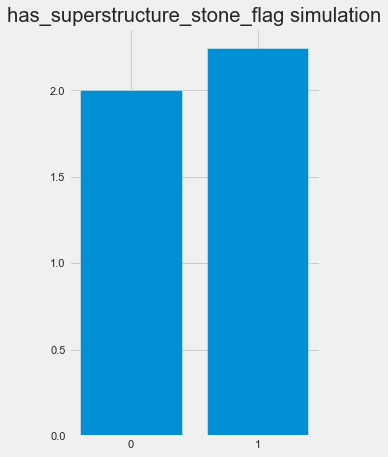

In [55]:
f, axes = plt.subplots(1, 1, figsize=(4, 7))
ftype = ['0','1']

plt.bar(ftype,f_lst)
plt.title('has_superstructure_stone_flag simulation')

plt.show()

### has_superstructure_stone_flag:
### the damage grade would be higher if the structure was made of stone